O objetivo desse notebook é fazer uma Análise Exploratória de Dados(EDA) sobre o dataset breast-cancer.csv. A partir desta análise, será possível entender e se familiarizar com o dataset para, posteriormente, realizar os treinamentos de modelos que poderão prever, de acordo com diferentes métricas, se um tumor é benigno(B) ou maligno(M).

### Importações iniciais

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Carregamento da base de dados

In [11]:
breast_cancer_df = pd.read_csv("./breast-cancer.csv")

### Inspeção inicial dos dados

In [4]:
breast_cancer_df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [5]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
breast_cancer_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

Com base na inspeção inicial, não há valores faltantes, duplicados ou erro de tipagem no dataset.

Porém, a coluna id, por se tratar de uma coluna de identificadores únicos de pacientes, não é importante para análises preditivas. Dessa forma, a coluna deve ser removida, visando uma melhor eficiência do algoritmo de ML que será utilizado posteriormente.

In [7]:
breast_cancer_df_backup = breast_cancer_df.copy()

In [9]:
breast_cancer_df_backup.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Removendo a coluna 'id'
breast_cancer_df = breast_cancer_df.drop(['id'], axis=1)

In [13]:
breast_cancer_df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Inspeção da variável ['Diagnosis']

A nossa variável alvo é 'diagnosis'. Por isso, vamos fazer algumas análises acerca dela.

In [14]:
breast_cancer_df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
# criando um numpy array a partir da coluna 'diagnosis'
diagnosis = np.array(breast_cancer_df['diagnosis'])

In [ ]:
# registrando os valores únicos e suas contagens
val_unicos = np.unique(diagnosis, return_counts=True)

In [ ]:
# exibindo
val_unicos

(array(['B', 'M'], dtype=object), array([357, 212]))

Vimos que há 357 valores 'B' e 212 valores 'M' na coluna 'diagnosis'.

Agora, vamos gerar um gráfico para visualizar de forma mais prática essa diferença:

<Axes: xlabel='diagnosis', ylabel='Count'>

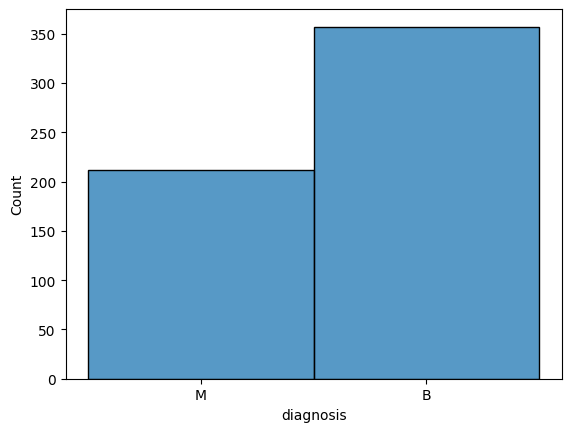

In [27]:
sns.histplot(breast_cancer_df['diagnosis'])

De acordo com o gráfico, percebe-se que a quantidade de diagnósticos marcados como 'B'(benigno) é quase 70% maior do que os marcados como 'M'(maligno). A distribuição final do dataset é, aproximadamente: 63% 'B' e 37% 'M'.

Com isso, vimos que o dataset se encontra desbalanceado, um pouco distante do ideal para uma classificação binária, que seria 50/50. Por isso, futuramente, possivelmente a métrica 'acurácia' não será tão interessante quanto 'recall' ou 'f1-score' no quesito relevância. 

### Tratamento da variável alvo

Modelos matemáticos não entendem letras, como 'M' ou 'B'(no caso da coluna 'diagnosis'). Por isso, é necessário converter essa coluna  categórica para numérica binária(ex: Maligno = 1, Benigno = 0). Para isso, usaremos o Label Encoder

In [ ]:
# importando o encoder
from sklearn.preprocessing import LabelEncoder

In [29]:
# criando uma instância do encoder para ser utilizada
label_encoder = LabelEncoder()

In [ ]:
# convertendo a coluna 'diagnosis' com o encoder
breast_cancer_df['diagnosis'] = label_encoder.fit_transform(breast_cancer_df['diagnosis'])

In [35]:
label_encoder.classes_

array(['B', 'M'], dtype=object)

De acordo com os índices, o valor 'B' foi transformado em 0 e o valor 'M' foi transformado em 1

In [ ]:
# Visualizando o dataset atualizado
breast_cancer_df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Agora, vamos converter o dataframe em um novo arquivo csv atualizado, pronto para uso.

In [36]:
breast_cancer_df.to_csv('breast-cancer-updated.csv', index=False)